In [105]:
!pip3 install imblearn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [106]:
import pandas as pd
import math
import numpy as np
import getpass
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

dt_salary = pd.read_csv ("/Users/danort/Desktop/Ironhack labs/Prediction salaries /archive (1)/Salary_database.csv")
dt_salary


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


# EDA/DATA CLEANING

In [107]:
print(dt_salary.shape)
print(dt_salary.info())

(6704, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB
None


In [108]:
#checking for missing values and NANS.
print(dt_salary.isnull().sum())

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64


In [109]:
# I drop the Nans and Nulls values, cause they were to less and they did not have a massive inpact in my dataset. 
dt_salary = dt_salary.dropna()
dt_salary.shape

(6698, 9)

In [110]:
# I checked for duples in the dataframe.

dupes=dt_salary.duplicated()
#dupes
sum(dupes)

0

In [111]:
dt_salary.drop(["Unnamed: 0"], axis=1, inplace=True)


/var/folders/z3/zkpb2ps91dx87fy5yc5z6vh40000gn/T/ipykernel_23616/3046409105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_salary.drop(["Unnamed: 0"], axis=1, inplace=True)


In [112]:
# inspecting the structure of my dataframe after dropping Nans,null and column Unnamed.

display(dt_salary[0:5].T)

,0,1,2,3,4
Age,32.0,28.0,45.0,36.0,52.0
Gender,Male,Female,Male,Female,Male
Education Level,Bachelor's,Master's,PhD,Bachelor's,Master's
Job Title,Software Engineer,Data Analyst,Senior Manager,Sales Associate,Director
Years of Experience,5.0,3.0,15.0,7.0,20.0
Salary,90000.0,65000.0,150000.0,60000.0,200000.0
Country,UK,USA,Canada,USA,USA
Race,White,Hispanic,White,Hispanic,Asian


In [113]:
round(dt_salary.describe())

,Age,Years of Experience,Salary
count,6698.0,6698.0,6698.0
mean,34.0,8.0,115329.0
std,8.0,6.0,52790.0
min,21.0,0.0,350.0
25%,28.0,3.0,70000.0
50%,32.0,7.0,115000.0
75%,38.0,12.0,160000.0
max,62.0,34.0,250000.0


# FEATURE ENGINEERING

In [114]:
# Make a copy of the DataFrame
dt_salary1 = dt_salary.copy()

In [115]:
# Define a function to categorize years of experience as junior (1) or senior (0)
def categorize_junior(exp):
    if exp <= 3.0:
        return 1
    else:
        return 0

# Define a function to categorize years of experience as senior (1) or junior (0)
def categorize_senior(exp):
    if exp > 3.0:
        return 1
    else:
        return 0

# Apply the functions to create new columns 'Junior' and 'Senior'
dt_salary1['Junior'] = dt_salary1['Years of Experience'].apply(categorize_junior)
dt_salary1['Senior'] = dt_salary1['Years of Experience'].apply(categorize_senior)


In [116]:
dt_salary1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Junior,Senior
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,0,1
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,0,1
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed,0,1
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian,1,0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese,0,1
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean,0,1


In [117]:
# Let's separate the numerical from the categorical columns:
numerical_columns = dt_salary1.select_dtypes("number")
categorical_columns = dt_salary1.select_dtypes("object")

In [118]:
numerical_columns


,Age,Years of Experience,Salary,Junior,Senior
0,32.0,5.0,90000.0,0,1
1,28.0,3.0,65000.0,1,0
2,45.0,15.0,150000.0,0,1
3,36.0,7.0,60000.0,0,1
4,52.0,20.0,200000.0,0,1
...,...,...,...,...,...
6699,49.0,20.0,200000.0,0,1
6700,32.0,3.0,50000.0,1,0
6701,30.0,4.0,55000.0,0,1
6702,46.0,14.0,140000.0,0,1


Text(0.5, 1.0, 'Distributions')

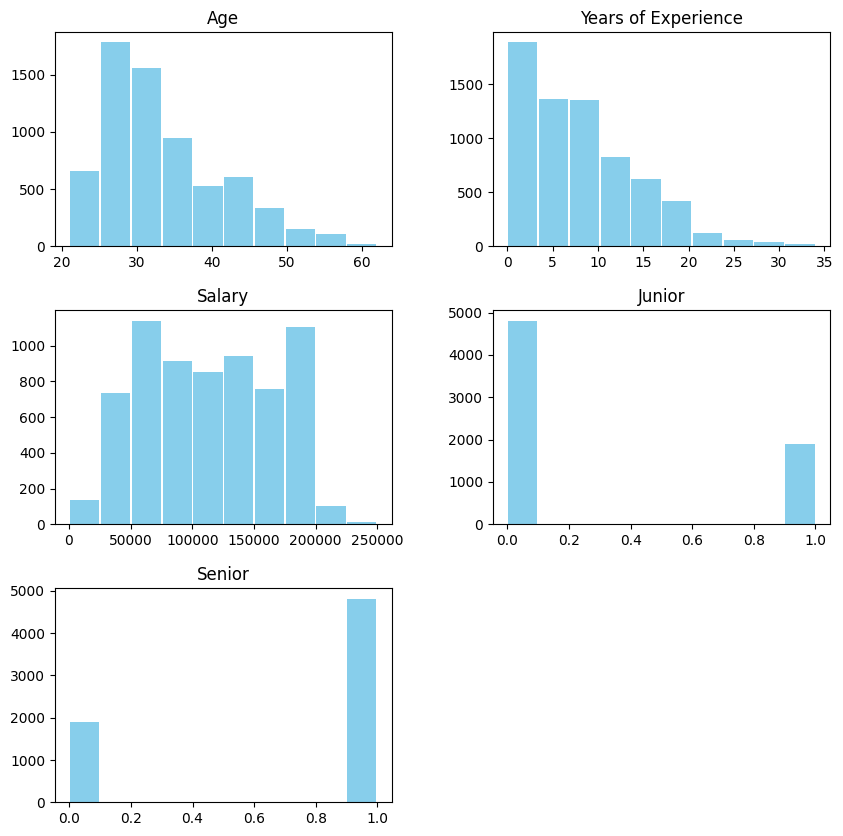

In [119]:
dt_salary1.hist(figsize = (10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")

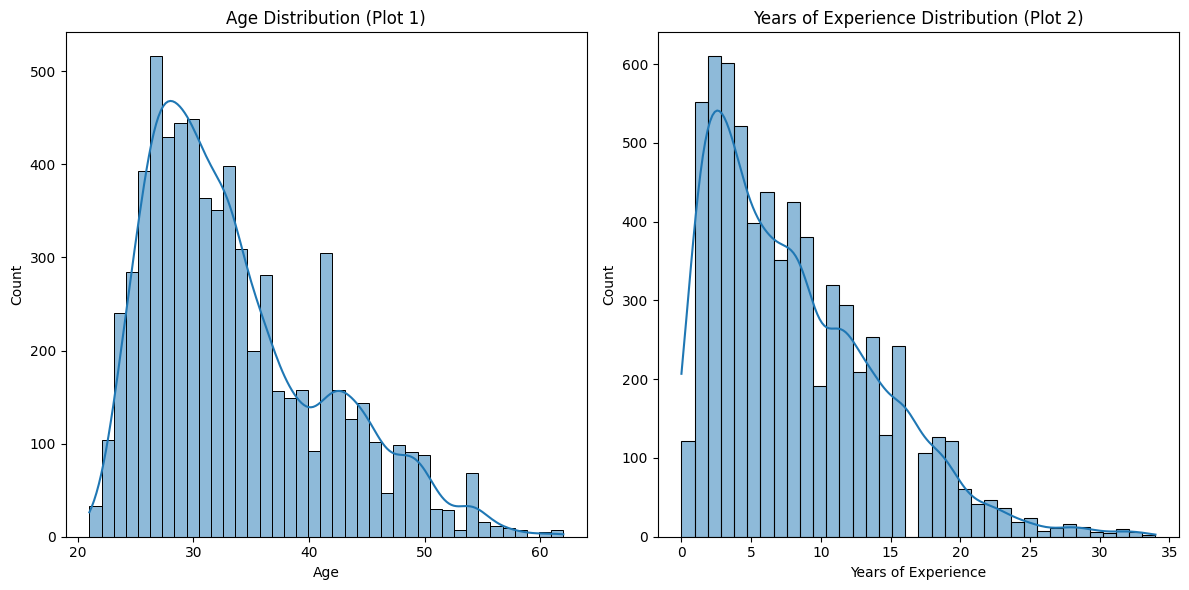

In [120]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(dt_salary1["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution (Plot 1)")

sns.histplot(dt_salary1["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution (Plot 2)")

plt.tight_layout()

plt.show()


# DEALING WITH OUTLIERS

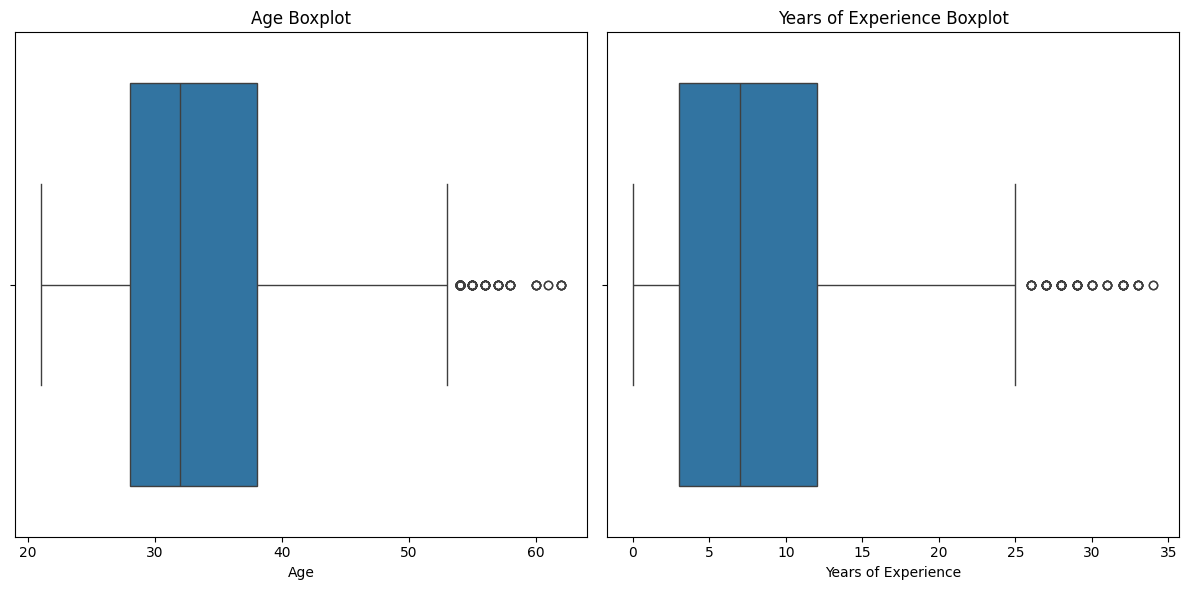

In [121]:
# Create subplots for each column
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create boxplots for Age and Years of Experience columns
sns.boxplot(x=dt_salary1["Age"], ax=axs[0])
axs[0].set_title("Age Boxplot")

sns.boxplot(x=dt_salary1["Years of Experience"], ax=axs[1])
axs[1].set_title("Years of Experience Boxplot")

plt.tight_layout()
plt.show()

In [122]:
# To calculate the exact outliers range for Age:
IQR_age = abs(np.quantile(dt_salary1["Age"], 0.25) - np.quantile(dt_salary1["Age"], 0.75)) * 1.5
lower_boundary_age = np.quantile(dt_salary1["Age"], 0.25) - IQR_age
upper_boundary_age = np.quantile(dt_salary1["Age"], 0.75) + IQR_age

# To calculate the exact outliers range for Years of Experience:
IQR_exp = abs(np.quantile(dt_salary1["Years of Experience"], 0.25) - np.quantile(dt_salary1["Years of Experience"], 0.75)) * 1.5
lower_boundary_exp = np.quantile(dt_salary1["Years of Experience"], 0.25) - IQR_exp
upper_boundary_exp = np.quantile(dt_salary1["Years of Experience"], 0.75) + IQR_exp

print("Age Outlier Boundaries:")
print("Lower Boundary:", lower_boundary_age)
print("Upper Boundary:", upper_boundary_age)

print("\nYears of Experience Outlier Boundaries:")
print("Lower Boundary:", lower_boundary_exp)
print("Upper Boundary:", upper_boundary_exp)

Age Outlier Boundaries:
Lower Boundary: 13.0
Upper Boundary: 53.0

Years of Experience Outlier Boundaries:
Lower Boundary: -10.5
Upper Boundary: 25.5


In [123]:
# Adjust the lower boundary for Years of Experience to be non-negative
lower_boundary_exp = max(0, np.quantile(dt_salary1["Years of Experience"], 0.25) - IQR_exp)

Text(0.5, 1.0, 'Age Distribution (After) - Boxplot')

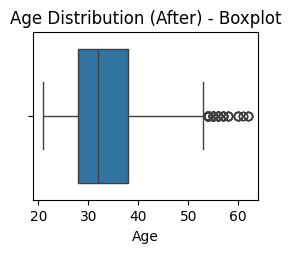

In [124]:
from scipy import stats
# Identify and remove outliers for Age
z_scores_age = stats.zscore(dt_salary1['Age'])
threshold_age = 3
outlier_indices_age = np.where(np.abs(z_scores_age) > threshold_age)[0]
data_p1_cleaned_age = dt_salary1.drop(outlier_indices_age)

 # Plot after removing outliers for Age using boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=data_p1_cleaned_age['Age'])
plt.title('Age Distribution (After) - Boxplot')

In [125]:
# Normalization

dt_salary1['Age_log'] = np.log1p(dt_salary1['Age'])
dt_salary1['YE_log'] = np.log1p(dt_salary1['Years of Experience'])

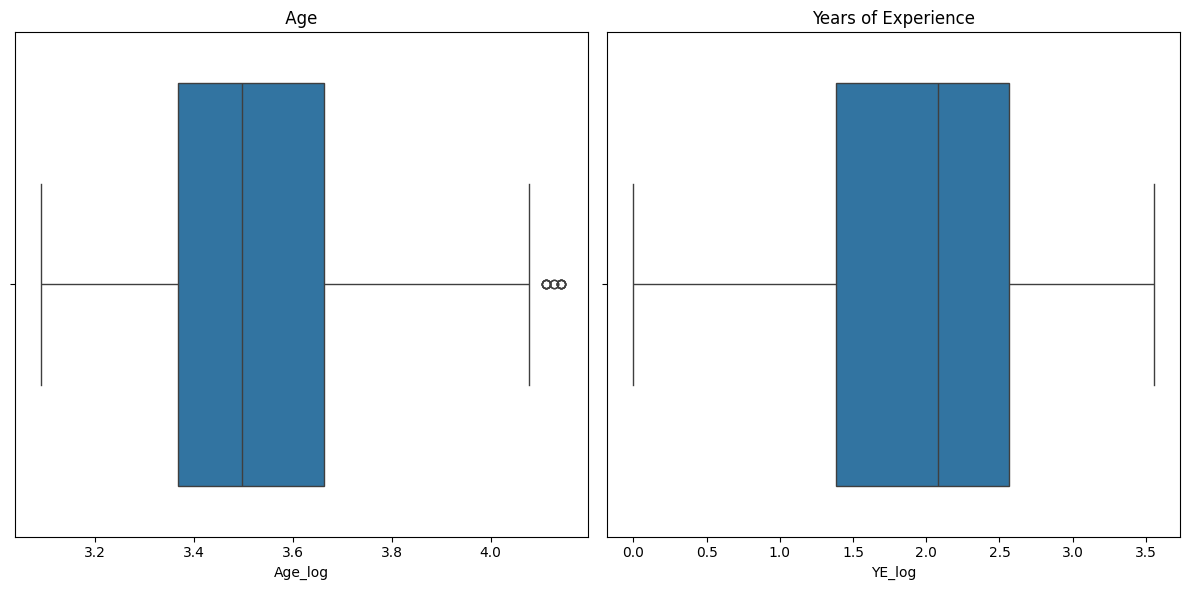

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=dt_salary1["Age_log"], ax=axes[0])
axes[0].set_title(" Age ")

sns.boxplot(x=dt_salary1["YE_log"], ax=axes[1])
axes[1].set_title("Years of Experience")

plt.tight_layout()

plt.show()

In [127]:
from scipy.stats.mstats import winsorize

dt_salary1['Age_winsorized'] = winsorize(dt_salary1['Age'], limits=[0.05, 0.05])
dt_salary1['YE_winsorized'] = winsorize(dt_salary1['Years of Experience'], limits=[0.05, 0.05])



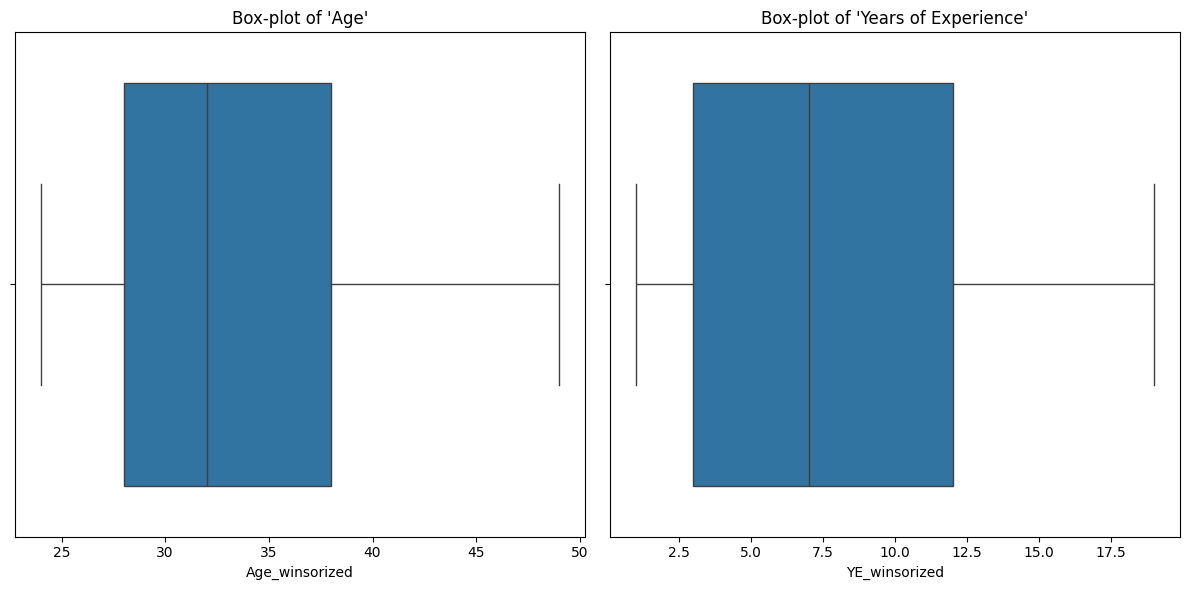

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=dt_salary1["Age_winsorized"], ax=axes[0])
axes[0].set_title("Box-plot of 'Age'")

sns.boxplot(x=dt_salary1["YE_winsorized"], ax=axes[1])
axes[1].set_title("Box-plot of 'Years of Experience'")

plt.tight_layout()

plt.show()

In [129]:
dt_salary1["Age"] = dt_salary1["Age_winsorized"]
dt_salary1["Years of Experience"] = dt_salary1["YE_winsorized"]

dt_salary1.drop(["Age_winsorized", "Age_log", "YE_winsorized", "YE_log"], axis = 1, inplace = True)
dt_salary1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Junior,Senior
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,0,1
4,49.0,Male,Master's,Director,19.0,200000.0,USA,Asian,0,1


# Encoding and creating a new copy of my dataframe.

In [130]:
dt_salary1["Education Level"] = dt_salary1["Education Level"].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"])
dt_salary1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [131]:
dt_salary2 = pd.get_dummies(dt_salary1, columns = ["Gender", "Job Title" ,"Country", "Race"])
dt_salary2.head()

,Age,Education Level,Years of Experience,Salary,Junior,Senior,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,Bachelor's,5.0,90000.0,0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,Master's,3.0,65000.0,1,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,PhD,15.0,150000.0,0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,Bachelor's,7.0,60000.0,0,1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,49.0,Master's,19.0,200000.0,0,1,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [132]:
from sklearn.preprocessing import OrdinalEncoder
education_order = ["High School", "Bachelor's", "Master's", "PhD"]
encoder = OrdinalEncoder(categories=[education_order])
dt_salary2["Education Level"] = encoder.fit_transform(dt_salary2[["Education Level"]])
dt_salary2.head()

,Age,Education Level,Years of Experience,Salary,Junior,Senior,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,1.0,5.0,90000.0,0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,28.0,2.0,3.0,65000.0,1,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,45.0,3.0,15.0,150000.0,0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,36.0,1.0,7.0,60000.0,0,1,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,49.0,2.0,19.0,200000.0,0,1,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [133]:
round(dt_salary2.describe())

,Age,Education Level,Years of Experience,Salary,Junior,Senior
count,6698.0,6698.0,6698.0,6698.0,6698.0,6698.0
mean,33.0,2.0,8.0,115329.0,0.0,1.0
std,7.0,1.0,5.0,52790.0,0.0,0.0
min,24.0,0.0,1.0,350.0,0.0,0.0
25%,28.0,1.0,3.0,70000.0,0.0,0.0
50%,32.0,1.0,7.0,115000.0,0.0,1.0
75%,38.0,2.0,12.0,160000.0,1.0,1.0
max,49.0,3.0,19.0,250000.0,1.0,1.0


# Vizualizations

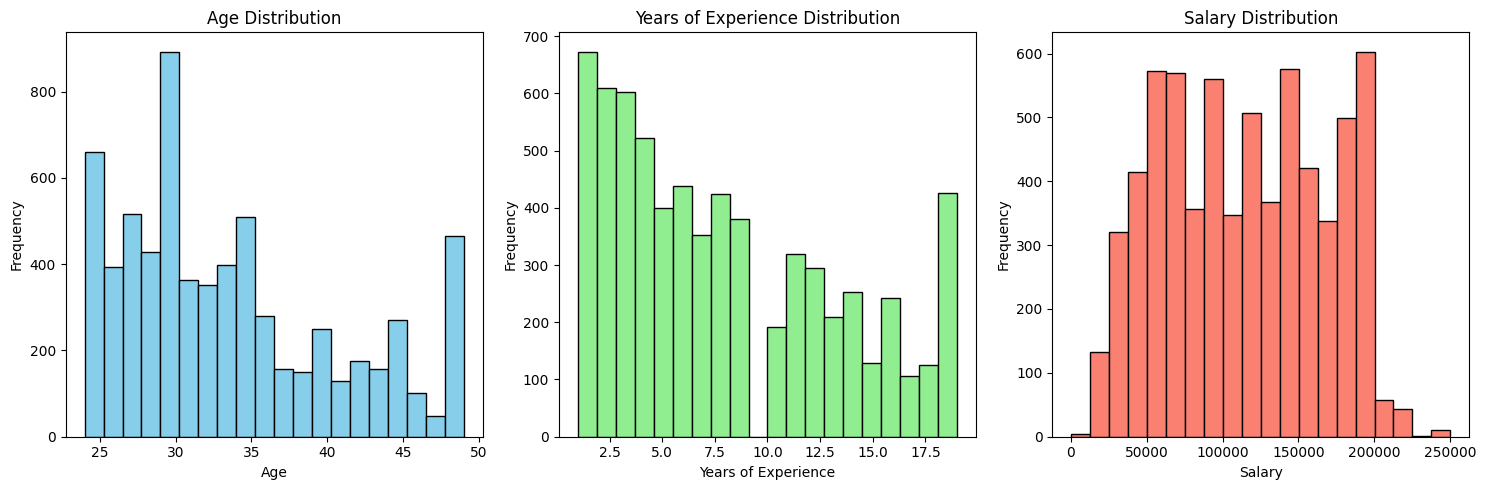

In [134]:

# Plot histograms for Age, Years of Experience, and Salary
plt.figure(figsize=(15, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(dt_salary2['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Years of Experience
plt.subplot(1, 3, 2)
plt.hist(dt_salary2['Years of Experience'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

# Histogram for Salary
plt.subplot(1, 3, 3)
plt.hist(dt_salary2['Salary'], bins=20, color='salmon', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

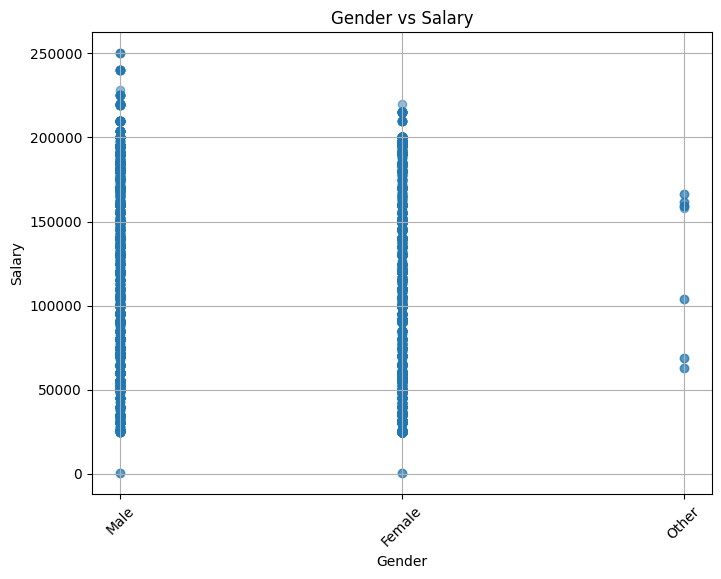

In [135]:
#ploting the Gender vs My targer varuable 

plt.figure(figsize=(8, 6))
plt.scatter(dt_salary['Gender'], dt_salary['Salary'], alpha=0.5)
plt.title('Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

Race Vs Salary

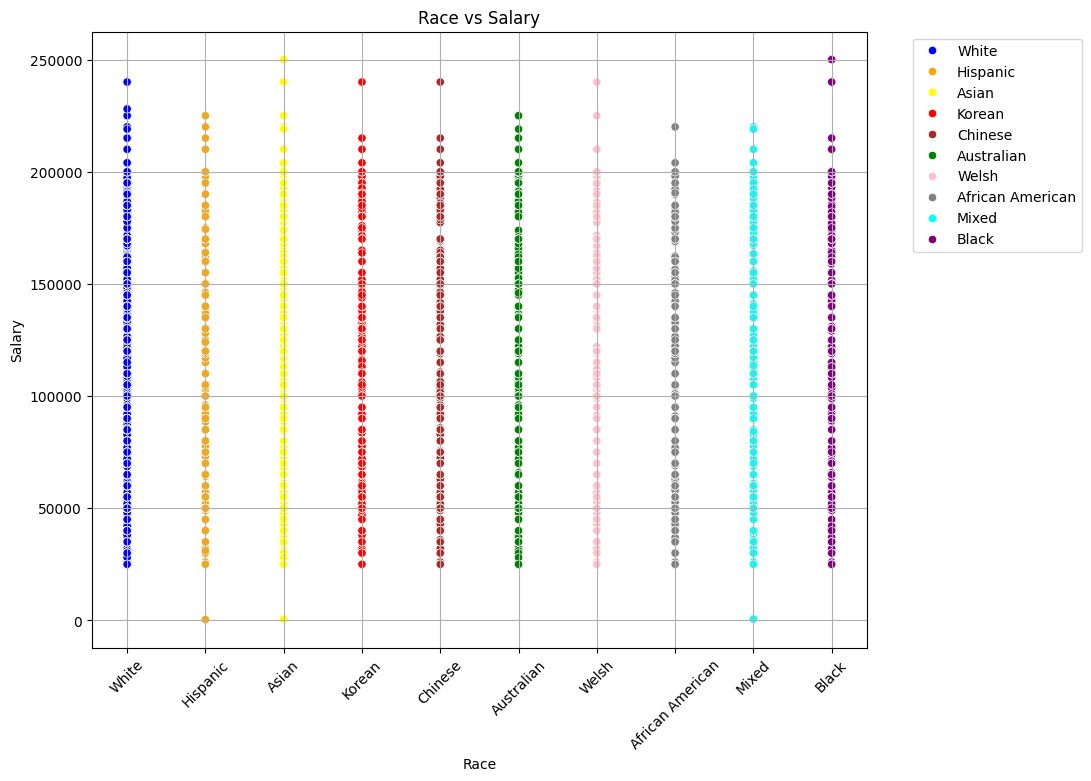

In [136]:
# Setting custom colors for each race category
colors = {'White': 'blue', 'Australian': 'green', 'Hispanic': 'orange', 'Korean': 'red',
          'Black': 'purple', 'Chinese': 'brown', 'Welsh': 'pink', 'African American': 'gray', 
          'Mixed': 'cyan', 'Asian': 'yellow'}

# Plot Race versus Salary using Seaborn scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Race', y='Salary', hue='Race', palette=colors, data=dt_salary)
plt.title('Race vs Salary')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [137]:
# Remove duplicate entries based on 'Job Title'
df_unique = dt_salary1.drop_duplicates(subset='Job Title')

# Sort the unique DataFrame by 'Salary' in descending order and select the top 10 entries
top_10_jobs = df_unique.sort_values(by='Salary', ascending=False).head(10)

print("Top 10 Highest-Paid Jobs:")
top_10_jobs[['Job Title', 'Salary']]

Top 10 Highest-Paid Jobs:


,Job Title,Salary
30,CEO,250000.0
83,Chief Technology Officer,250000.0
2260,Director of Data Science,220000.0
105,Chief Data Officer,220000.0
4,Director,200000.0
53,VP of Finance,200000.0
1204,Senior Project Engineer,195000.0
41,Operations Director,190000.0
72,Research Director,190000.0
21,VP of Operations,190000.0


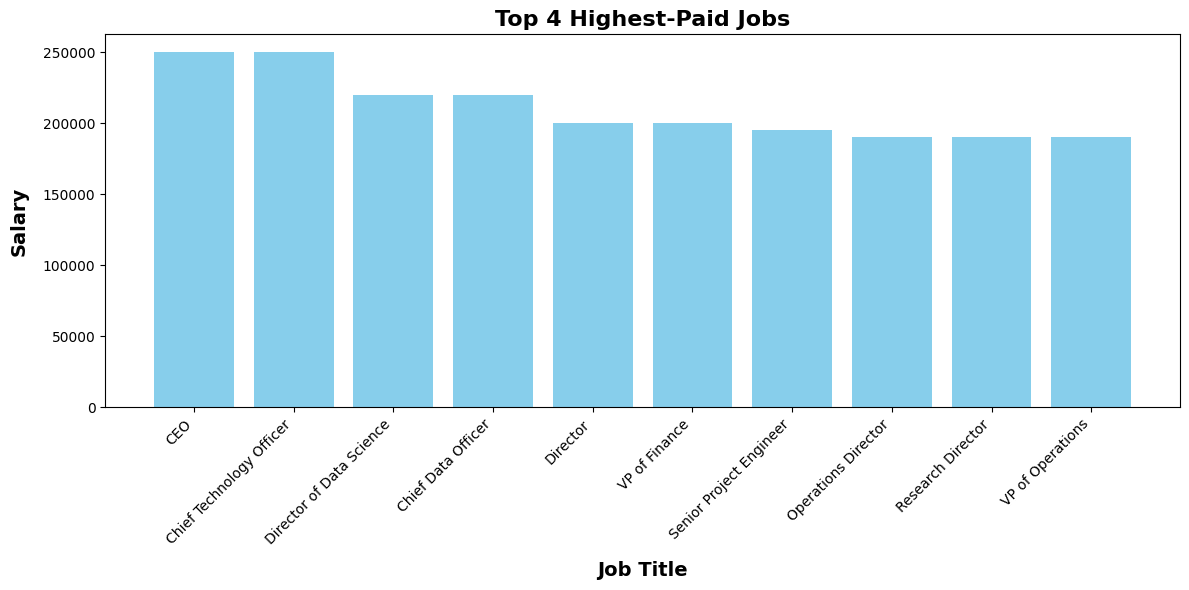

In [138]:

top_4_jobs = dt_salary1.sort_values(by='Salary', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_jobs['Job Title'], top_10_jobs['Salary'], color='skyblue')
plt.xlabel('Job Title', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Salary', fontsize=14, weight='bold', labelpad=10)
plt.title('Top 4 Highest-Paid Jobs', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

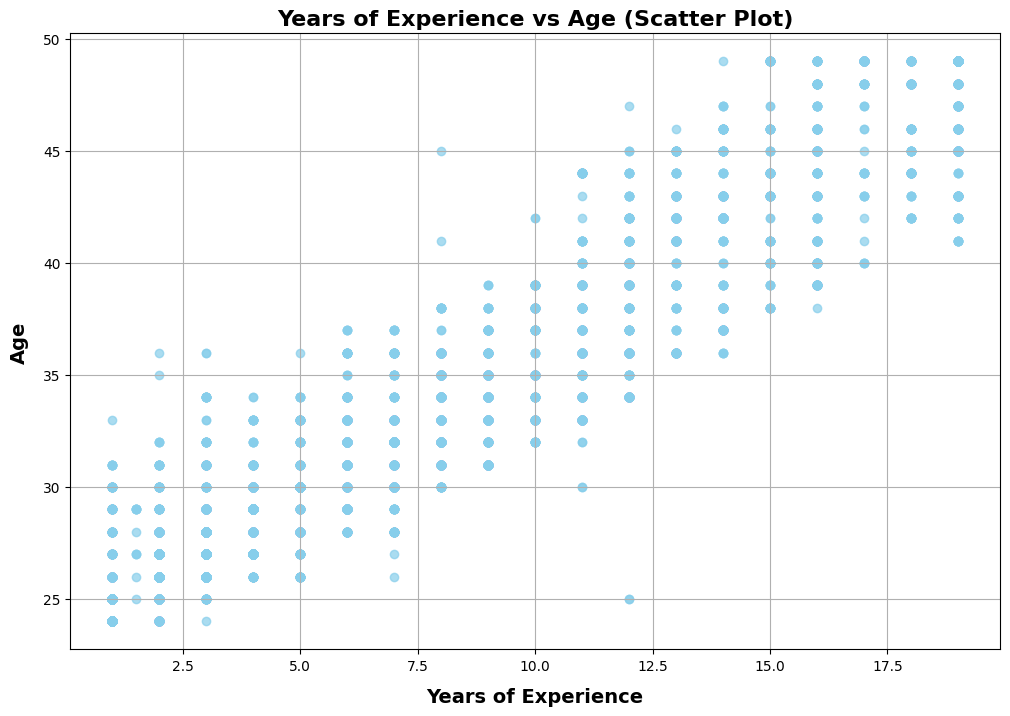

In [139]:
plt.figure(figsize=(12, 8))
plt.scatter(dt_salary1['Years of Experience'], dt_salary1['Age'], color='skyblue', alpha=0.7)
plt.xlabel('Years of Experience', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Age', fontsize=14, weight='bold', labelpad=10)
plt.title('Years of Experience vs Age (Scatter Plot)', fontsize=16, weight='bold')
plt.grid(True)  
plt.show()

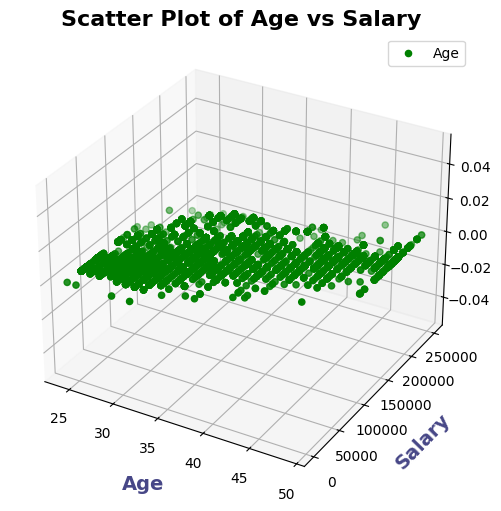

In [140]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(dt_salary1["Age"], dt_salary1["Salary"], zs=0, zdir='z', label='Age', color='green')

# Setting labels and title
ax.set_xlabel('Age', fontsize=14, weight="bold", color="#474787", labelpad=10)
ax.set_ylabel('Salary', fontsize=14, weight="bold", color="#474787", labelpad=10)
ax.set_zlabel('Z', fontsize=14, weight="bold", color="#474787", labelpad=10)  # Dummy Z-axis label
ax.set_title('Scatter Plot of Age vs Salary', fontsize=16, weight="bold")

# Show legend
ax.legend()

plt.show()

# CORRELATION

In [141]:
# Calculate correlation matrix
correlation_matrix = dt_salary2.corr()
print(correlation_matrix)

                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.596003             0.948510  0.734473   
Education Level      0.596003         1.000000             0.637121  0.642828   
Years of Experience  0.948510         0.637121             1.000000  0.835517   
Salary               0.734473         0.642828             0.835517  1.000000   
Junior              -0.613581        -0.500500            -0.676863 -0.680958   
...                       ...              ...                  ...       ...   
Race_Hispanic       -0.025350        -0.008312            -0.022271 -0.020942   
Race_Korean         -0.002107         0.011309             0.001490  0.009076   
Race_Mixed           0.002210         0.010152             0.002027  0.004347   
Race_Welsh           0.005224         0.016099            -0.000049 -0.011997   
Race_White           0.020623         0.006459             0.022307  0.021345   

                       Juni

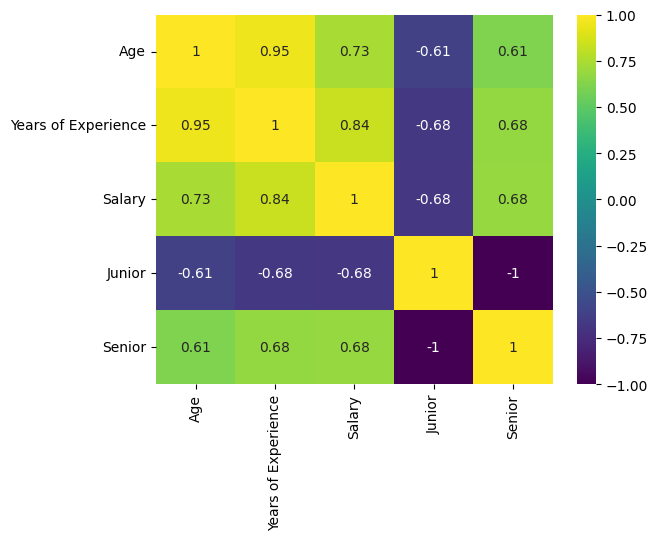

,Age,Years of Experience,Salary,Junior,Senior
Age,1.000000,0.948510,0.734473,-0.613581,0.613581
Years of Experience,0.948510,1.000000,0.835517,-0.676863,0.676863
Salary,0.734473,0.835517,1.000000,-0.680958,0.680958
Junior,-0.613581,-0.676863,-0.680958,1.000000,-1.000000
Senior,0.613581,0.676863,0.680958,-1.000000,1.000000


In [142]:
# Heatmap

correlation_matrix = dt_salary2[["Age", "Years of Experience", "Salary", "Junior", "Senior"]].corr()
sns.heatmap(correlation_matrix[0:10], annot=True, cmap='viridis')  # You can choose any colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis')
plt.show()

# Optionally, you can return the correlation matrix as well
correlation_matrix

# Machine learning model. - Linear Regression.

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_need_scaling = ["Age", "Years of Experience","Education Level","Junior","Senior"]
dt_salary2[columns_need_scaling] = scaler.fit_transform(dt_salary2[columns_need_scaling])
dt_salary2.head()

,Age,Education Level,Years of Experience,Salary,Junior,Senior,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,-0.207914,-0.702334,-0.528303,90000.0,-0.625818,0.625818,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-0.764735,0.431216,-0.892953,65000.0,1.597910,-1.597910,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.601753,1.564766,1.294951,150000.0,-0.625818,0.625818,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.348907,-0.702334,-0.163652,60000.0,-0.625818,0.625818,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2.158574,0.431216,2.024253,200000.0,-0.625818,0.625818,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


Mean Squared Error: 629724221.7496656
R-squared Score: 0.7791572079914734


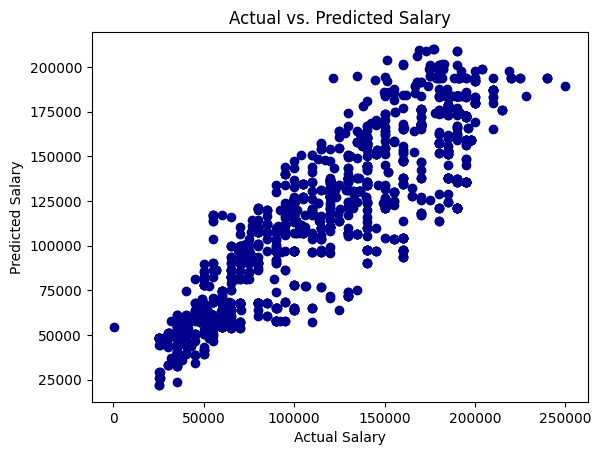

In [144]:
target_column = 'Salary'
X = dt_salary2[[ 'Age','Years of Experience','Education Level','Junior','Senior']]  # Features
y = dt_salary2[target_column]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Evaluation
# Evaluating the model on the testing set
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can visualize the actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred,color='darkblue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.show()

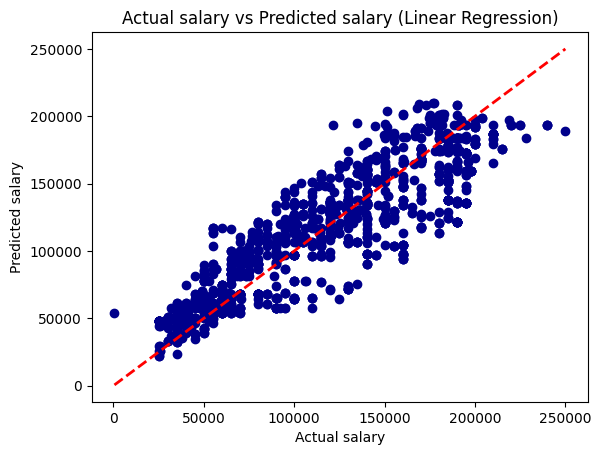

In [145]:
plt.scatter(y_test, y_pred, color='darkblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual salary")
plt.ylabel("Predicted salary")
plt.title("Actual salary vs Predicted salary (Linear Regression)")
plt.show()

# DecisionTreeRegressor Model

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = dt_salary2[[ 'Age','Years of Experience','Education Level','Junior','Senior']]  # Features
y = dt_salary2[target_column]  # Target variable


# Instantiate the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print evaluation metrics
print("Decision Tree Model:")
print("Mean Squared Error:", mse_tree)
print("R-squared Score:", r2_tree)

Decision Tree Model:
Mean Squared Error: 320671691.79673
R-squared Score: 0.8875411977361737


In [147]:
tree_model.score(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.9105057417082659

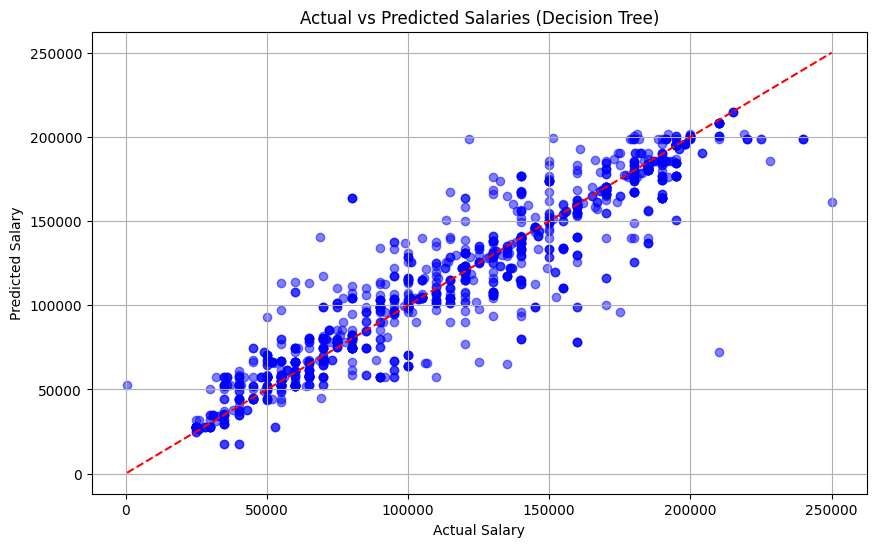

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Salaries (Decision Tree)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

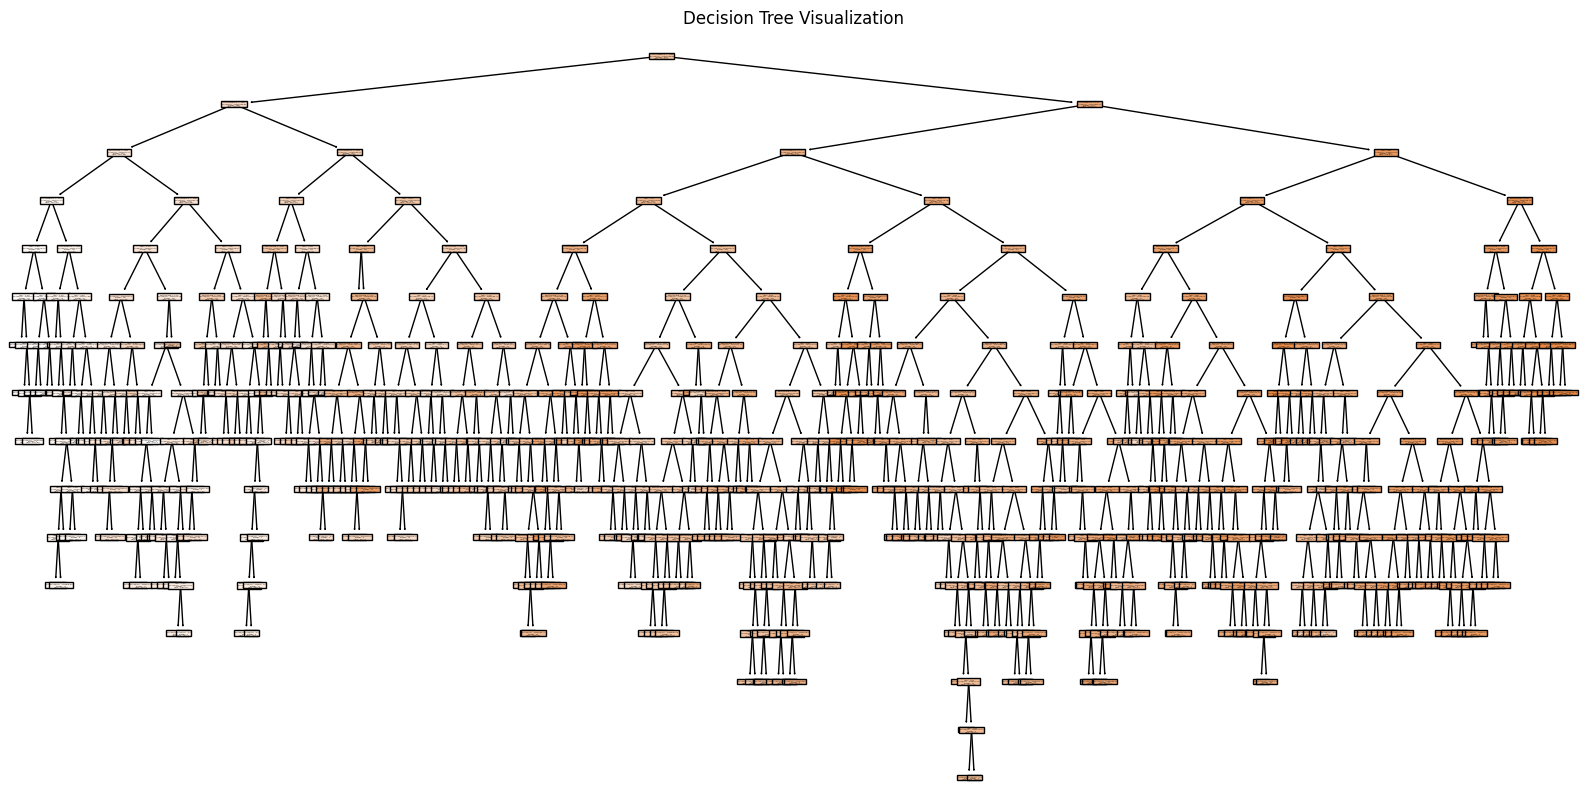

In [149]:
from sklearn.tree import plot_tree

# Visualiztion of the decision tree.
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

In [150]:
# Get the parameters of the decision tree model
tree_params = tree_model.get_params()

# Print the parameters
print("Decision Tree Model Parameters:")
tree_params


Decision Tree Model Parameters:


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# RandomForestRegressor


In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Random Forest regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

X = dt_salary2[[ 'Age','Years of Experience','Education Level','Junior','Senior']]  # Features
y = dt_salary2[target_column]  # Target variable


# Train the Random Forest model
forest_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_forest = forest_model.predict(X_test_scaled)

# Evaluate the model's performance
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Print evaluation metrics
print("Random Forest Model:")
print("Mean Squared Error:", mse_forest)
print("R-squared Score:", r2_forest)

Random Forest Model:
Mean Squared Error: 312171986.82672507
R-squared Score: 0.8905220241233328


In [152]:
forest_model.score(X_train_scaled, y_train)

0.9096389430324205

In [153]:
print("Min Actual Salary:", np.min(y_test))
print("Max Actual Salary:", np.max(y_test))
print("Min Predicted Salary:", np.min(y_pred_forest))
print("Max Predicted Salary:", np.max(y_pred_forest))

Min Actual Salary: 550.0
Max Actual Salary: 250000.0
Min Predicted Salary: 20153.08787878788
Max Predicted Salary: 215000.0


# RandomForestRegressor - Classification Model.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = dt_salary1[['Years of Experience']]  # Feature: Years of Experience
y = (dt_salary1['Years of Experience'] > 3.0).astype(int)  # Target: Binary classification (0 for junior, 1 for senior)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



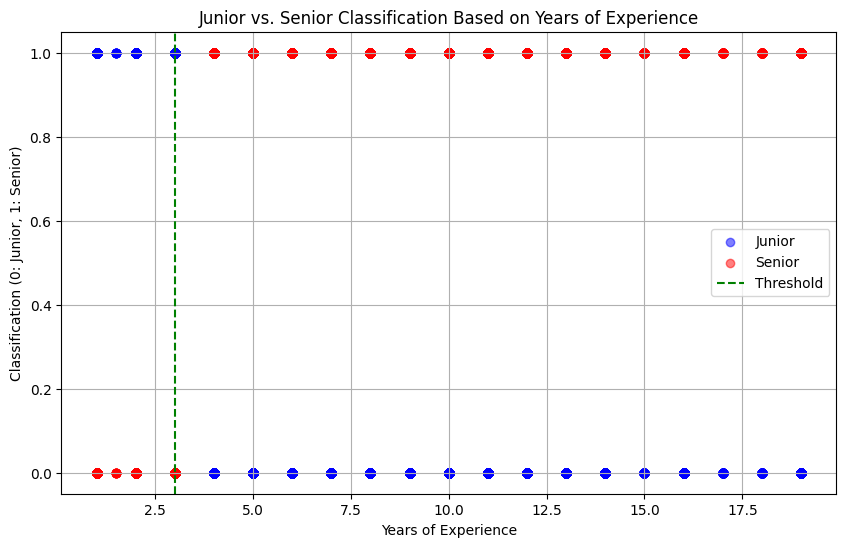

In [155]:
import matplotlib.pyplot as plt

# Define the threshold for classifying as Junior or Senior
threshold = 3.0

# Create a scatter plot of years of experience
plt.figure(figsize=(10, 6))
plt.scatter(dt_salary1['Years of Experience'], dt_salary1['Junior'], label='Junior', color='blue', alpha=0.5)
plt.scatter(dt_salary1['Years of Experience'], dt_salary1['Senior'], label='Senior', color='red', alpha=0.5)

# Plot the threshold line
plt.axvline(x=threshold, color='green', linestyle='--', label='Threshold')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Classification (0: Junior, 1: Senior)')
plt.title('Junior vs. Senior Classification Based on Years of Experience')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
import pandas as pd

# Define the threshold for classifying as Junior or Senior
threshold = 3.0

# Create a DataFrame to display the classification results
classification_table = pd.DataFrame({
    'Years of Experience': dt_salary1['Years of Experience'],
    'Junior': dt_salary1['Junior'].map({1: 'Yes', 0: 'No'}),
    'Senior': dt_salary1['Senior'].map({1: 'Yes', 0: 'No'})
})

# Display the classification table
classification_table

,Years of Experience,Junior,Senior
0,5.0,No,Yes
1,3.0,Yes,No
2,15.0,No,Yes
3,7.0,No,Yes
4,19.0,No,Yes
...,...,...,...
6699,19.0,No,Yes
6700,3.0,Yes,No
6701,4.0,No,Yes
6702,14.0,No,Yes


In [157]:
# Saving the copied DataFrame to a CSV file
dt_salary1.to_csv('copied_data.csv', index=False)

print("Copied data saved successfully.")

Copied data saved successfully.


In [158]:
# Saving the copied DataFrame to a CSV file
dt_salary2.to_csv('predicted_data.csv', index=False)

print("Copied data saved successfully.")

Copied data saved successfully.
